In [1]:
import pandas as pd
import matplotlib as plt
plt.rcParams["font.family"] = "Hancom Gothic"
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train['date']=pd.to_datetime(train['date'])
train['weekday']=train['date'].dt.weekday #0:월 6:일
#train = pd.get_dummies(train,columns=['weekday']) #weekday 변수 생성(원핫인코딩)
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6


In [3]:
test['date']=pd.to_datetime(test['date'])
test['weekday']=test['date'].dt.weekday
#test = pd.get_dummies(test,columns=['weekday'])

In [4]:
train['in_out'].value_counts()

시내    408500
시외      6923
Name: in_out, dtype: int64

In [5]:
train['in_out'] = train['in_out'].map({'시내':0,'시외':1})
test['in_out']=test['in_out'].map({'시내':0,'시외':1})
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6


In [6]:
train.isnull().sum() #결측치 없음

id               0
date             0
bus_route_id     0
in_out           0
station_code     0
station_name     0
latitude         0
longitude        0
6~7_ride         0
7~8_ride         0
8~9_ride         0
9~10_ride        0
10~11_ride       0
11~12_ride       0
6~7_takeoff      0
7~8_takeoff      0
8~9_takeoff      0
9~10_takeoff     0
10~11_takeoff    0
11~12_takeoff    0
18~20_ride       0
weekday          0
dtype: int64

<AxesSubplot:ylabel='6~7_ride'>

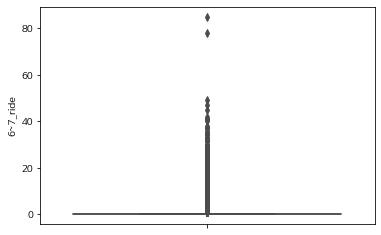

In [7]:
import seaborn as sns
sns.boxplot(data=train, y='6~7_ride', color='red')
#이상치는 중요한 정보이므로 제거하면 안 됨

In [8]:
weather = pd.read_csv('제주도날씨.csv',encoding='euc-kr')
weather=weather.fillna(0) #결측치 0으로 대체하기
#weather_jeju = weather[0:424]
#weather_gosan = weather[424:733]
#weather_sungsan = weather[733:1028]
#weather_seogwipo = weather[1028:1352]
#weather_seogwipo.head()

#weather = pd.get_dummies(weather,columns=['지점명']) #지점명 범주형 변수 생성(원핫인코딩)
weather = weather.drop(['지점','강수량 QC플래그'],axis=1) #지점이랑 QC플래그 쓸데없어 보여서 열 제거했음
weather.rename(columns={'일시':'date'},inplace=True)
weather['date']=pd.to_datetime(weather['date'])
weather['hour']=weather['date'].dt.hour
weather['date']=weather['date'].dt.date
weather.head()

,지점명,date,강수량(mm),hour
0,제주,2019-09-01,0.0,7
1,제주,2019-09-01,0.0,8
2,제주,2019-09-01,0.0,9
3,제주,2019-09-01,0.0,10
4,제주,2019-09-01,0.0,11


In [9]:
weather=weather[(weather['hour']<=12) & (weather['hour']>=6)].reset_index(drop=True) #6시~12시 사이 강수량
weather=weather.groupby('date')['강수량(mm)'].sum().reset_index() #6시~12시 사이의 누적 강수량만을 사용하기 위해
weather

,date,강수량(mm)
0,2019-09-01,0.0
1,2019-09-02,92.5
2,2019-09-03,37.2
3,2019-09-04,133.4
4,2019-09-05,7.2
5,2019-09-06,3.7
6,2019-09-07,1.6
7,2019-09-08,10.0
8,2019-09-09,42.5
9,2019-09-11,6.2


In [10]:
'''
#train['date']=pd.to_datetime(train['date'])
train.date=train.date.astype(str) #train의 date 형식 object로 변경하기(weather의 date 형식과 동일하게해야 merge 가능하니까)
train=pd.merge(train,weather, on='date', how='left') #test도 똑같이 해야 하는데 test 강수량이 없어서 진행 아직 못 함

#train의 행개수랑 weather의 행개수가 다른데 어떻게 병합하냐?
train
'''

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride,weekday,강수량(mm)
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,NaN
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6,NaN
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,6,NaN
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6,NaN
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415418,415418,2019-09-30,32820000,0,1129,한림환승정류장(한림리),33.41437,126.26336,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
415419,415419,2019-09-30,32820000,0,1564,제주시외버스터미널,33.49946,126.51479,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
415420,415420,2019-09-30,32820000,0,2322,해병부대,33.23100,126.26273,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,NaN
415421,415421,2019-09-30,32820000,0,3291,애월환승정류장(애월리),33.46483,126.31870,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN


지역 변수 기준

서부(w) : longitude <= 126.35, latitude < 33.5

남부(s) : 126.35 < longitude < 126.725, latitude < 33.32

동부(e) : longitude >= 126.75

북부(n) : 126.35 < longitude < 126.725, latitude > 33.42



In [12]:
region= []

for i in range (len(train)):
    if ((train["longitude"][i] <= 126.35) & (train["latitude"][i] < 33.5)):
        region.append('서')
    elif ((train["longitude"][i] > 126.35) & (train["longitude"][i] < 126.725) & (train["latitude"][i] < 33.32)):
        region.append('남')
    elif ((train["longitude"][i] >= 126.75)):
        region.append('동')
    elif ((train["longitude"][i] > 126.35) & (train["longitude"][i] < 126.725) & (train["latitude"][i] > 33.42)):
        region.append('북')
    else:
        region.append('기타')
        
train["region"]=region

In [13]:
train['bus_route_id'].value_counts()
train['station_code'].value_counts()

358        1610
3270       1535
357        1515
3271       1482
3278       1423
           ... 
3379          1
4239          1
6115009       1
3383          1
3552          1
Name: station_code, Length: 3563, dtype: int64

<AxesSubplot:xlabel='region', ylabel='total'>

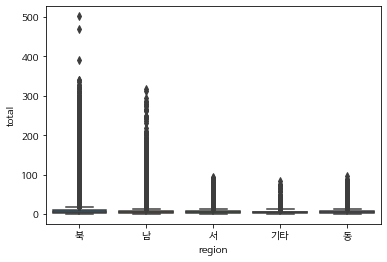

In [15]:
total_ride = train.drop(['id','date','bus_route_id','in_out','station_code','latitude','longitude'
                        ,'6~7_takeoff','7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff'
                        ,'11~12_takeoff','station_name','region'],axis=1)
total_ride['total'] = total_ride.sum(axis=1)
total_ride['region']=train['region']
total_ride.head()
sns.boxplot(y='total',x='region',data=total_ride)
#북부:제주,남부:서귀포,서부:고산,동부:성산,기타:그 외
#제주 주요 관광지는 통계자료 통해 제주, 서귀포에 많다는 것을 알 수 있음.
#버스 승하차는 출근 뿐만 아니라 관광지 영향도 클 것으로 보임.

In [ ]:
'''
train['bus_route_id'] = train['bus_route_id'].astype(str)
train['station_code'] = train['station_code'].astype(str)
train['route_station'] = train['bus_route_id'] + ',' + train['station_code'] 

test['bus_route_id'] = test['bus_route_id'].astype(str)
test['station_code'] = test['station_code'].astype(str)
test['route_station'] = test['bus_route_id'] + ',' + test['station_code']
#route_station = bus_route_id, station_code

train['bus_route_id_weekday'] = train['bus_route_id'].astype(str) + ',' + train['weekday'].astype(str) 
test['bus_route_id_weekday'] = test['bus_route_id'].astype(str) + ',' + test['weekday'].astype(str) 
#bus_route_id_weekday = bus_route_id, weekday

train['station_code_weekday'] = train['station_code'].astype(str) + ',' + train['weekday'].astype(str)
test['station_code_weekday'] = test['station_code'].astype(str) + ',' + test['weekday'].astype(str)
#station_code_weekday = station_code, weekday

train['route_station_weekday'] = train['route_station'].astype(str) + ',' + train['weekday'].astype(str) 
test['route_station_weekday'] = test['route_station'].astype(str) + ',' + test['weekday'].astype(str)
#route_station_weekday = route_station, weekday

train.head()
'''

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train_encode = train[['station_name','bus_route_id','station_code']]
test_encode = test[['station_name','bus_route_id','station_code']]
#train_encode = train[['station_name','bus_route_id','station_code', 'route_station_weekday', 'route_station']]
train_encoded = train_encode.apply(labelencoder.fit_transform)
test_encoded = test_encode.apply(labelencoder.fit_transform)

train['station_name2']=train_encoded['station_name'] #범주형 레이블인코딩함
train['bus_route_id2']=train_encoded['bus_route_id'] 
train['station_code2']=train_encoded['station_code']

test['station_name2']=test_encoded['station_name'] #범주형 레이블인코딩함
test['bus_route_id2']=test_encoded['bus_route_id'] 
test['station_code2']=test_encoded['station_code']

#train['route_station_weekday2']=train_encoded['route_station_weekday']
#train['route_station2']=train_encoded['route_station']
train = pd.get_dummies(train,columns=['weekday'])
test = pd.get_dummies(test,columns=['weekday'])

train.head()
#문자형 데이터는 어차피 레이블인코딩하고 원핫인코딩 해야함.
#순서가 없을 땐 원핫인코딩이 좋지만 고유값의 개수가 많으면 원핫인코딩은 비효율적임. 
#범주의 순서가 의미가 없어서 원핫인코딩을 하면 좋지만 고유값의 개수가 너~무 많으니 레이블인코딩을 하는게 낫지 않을까?
#weekday는 고유값이 7개밖에 없어서 원핫인코딩함

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,station_name2,bus_route_id2,station_code2,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,2019-09-01,4270000,1,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,1481,0,321,0,0,0,0,0,0,1
1,1,2019-09-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,4.0,...,1822,0,334,0,0,0,0,0,0,1
2,2,2019-09-01,4270000,1,432,정존마을,33.48181,126.47352,1.0,1.0,...,1406,0,407,0,0,0,0,0,0,1
3,3,2019-09-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,1431,0,1440,0,0,0,0,0,0,1
4,4,2019-09-01,4270000,0,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,1575,0,1501,0,0,0,0,0,0,1


In [ ]:
#scaler는 수치형의 단위같은 척도가 다를 때 표준화하기 위해 사용된다고 하는데 승하차인원의 단위는 동일하지않나?

In [17]:
test.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,station_name2,bus_route_id2,station_code2,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,415423,2019-10-01,4270000,1,344,제주썬호텔,33.48990,126.49373,4.0,4.0,...,1478,0,322,0,1,0,0,0,0,0
1,415424,2019-10-01,4270000,1,357,한라병원,33.48944,126.48508,1.0,6.0,...,1817,0,335,0,1,0,0,0,0,0
2,415425,2019-10-01,4270000,1,432,정존마을,33.48181,126.47352,2.0,4.0,...,1402,0,408,0,1,0,0,0,0,0
3,415426,2019-10-01,4270000,0,1579,제주국제공항(600번),33.50577,126.49252,1.0,11.0,...,1427,0,1433,0,1,0,0,0,0,0
4,415427,2019-10-01,4270000,0,1636,롯데호텔,33.24872,126.41032,0.0,0.0,...,475,0,1483,0,1,0,0,0,0,0


In [ ]:
#다중회귀나 릿지가 성능이 그리 좋지 않다함
#랜덤 포레스트는 회귀와 분류 둘 다 사용 가능하고, 대용량 데이터도 가능하며 오버피팅 회피하여 정확도 향상시킨다는 장점있음. 
#랜덤 포레스트에서 하이퍼 파라미터 튜닝을 하면 성능이 더 좋아지나봄. 근데 개오래걸림.
#lgbm 회귀는 처음 들어보는데 랜덤 포레스트+하이퍼 파라미터 튜닝에서 시간을 단축해준다는 장점이 있나봄.
#결론: 랜덤 포레스트 아니면 lgbm 이용하면 될 듯

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\hi\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


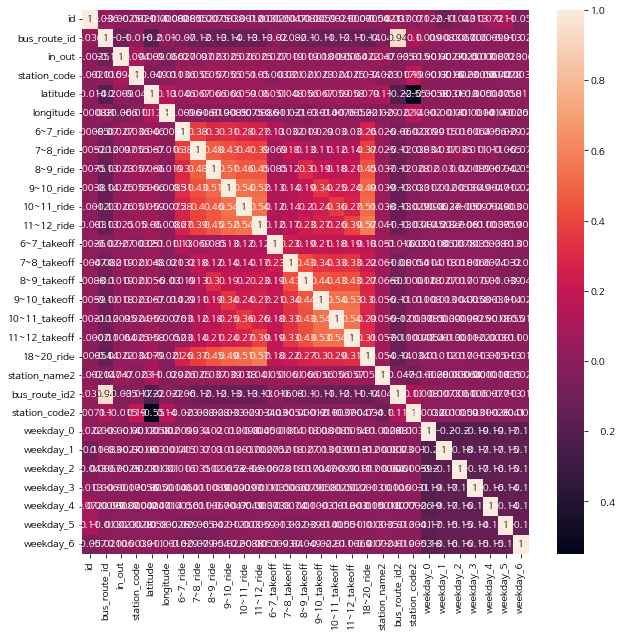

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [ ]:
#18~20_ride를 보면 7~8_ride,8~9_ride,9~10_ride,10~11_ride,11~12_ride임을 확인할 수 있음. 주관적으로 선택한거임.

In [61]:
from sklearn.model_selection import train_test_split

X = train[['id','date','bus_route_id','station_code','latitude','longitude', '6~7_ride','7~8_ride',
                 '8~9_ride','9~10_ride','10~11_ride','11~12_ride','6~7_takeoff',
                 '7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff','station_name','region']]



y = train[['18~20_ride']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

features = ['7~8_ride','8~9_ride','9~10_ride','10~11_ride','11~12_ride']
rfr = RandomForestRegressor()
X_train = train[features]
y_train = train['18~20_ride']

X_test = test[features]

sub = pd.read_csv('submission_sample.csv')
y_test = sub['18~20_ride']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(415423, 5)
(415423,)
(228170, 5)


In [39]:
model100 = RandomForestRegressor(n_estimators=100, random_state=0) #n_estimators:트리 개수, random_state:random 성질을 고정시킴
model100_5 = RandomForestRegressor(n_estimators=100, max_depth= 5, random_state=0) #max_depth: 모델의 과대 적합 방지를 위한 깊이 설정 변수
model200 = RandomForestRegressor(n_estimators=200)

model100.fit(X_train,y_train) #데이터에 가장 적합한 hyparameter 옵션을 찾기 위함
model100_5.fit(X_train,y_train)
model200.fit(X_train,y_train)

ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

sub = pd.read_csv('submission_sample.csv')
sub['18~20_ride'] = ypred1
sub.to_csv('model100.csv', index=False)

sub['18~20_ride'] = ypred2
sub.to_csv('model100_5.csv', index=False)

sub['18~20_ride'] = ypred3
sub.to_csv('model200.csv', index=False)

#뭐여 원래 모든 셀이 0임? 아님 0명이 탄다고야?

In [48]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test) #랜덤포레스트의 회귀 마무리가 머임?
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [67]:
train = pd.read_csv('train3.csv')
#test = pd.read_csv('test.csv')

from sklearn.model_selection import train_test_split

X = train[['id','bus_route_id','latitude','longitude', '6~7_ride','7~8_ride',
                 '8~9_ride','9~10_ride','10~11_ride','11~12_ride','6~7_takeoff',
                 '7~8_takeoff','8~9_takeoff','9~10_takeoff','10~11_takeoff','11~12_takeoff','region_e',
       'region_n', 'region_o', 'region_s', 'region_w', 'in_out_시내',
       'in_out_시외', 'rain_0', 'rain_1', 'rain_2', 'rain_3']]


y = train[['18~20_ride']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

In [70]:
from dmba import regressionSummary
regressionSummary(y_test, lr.predict(X_test))


Regression statistics

               Mean Error (ME) : -0.0010
Root Mean Squared Error (RMSE) : 0.2985
     Mean Absolute Error (MAE) : 0.2163


In [91]:
#!pip install xgboost
from xgboost import plot_importance
from xgboost import XGBClassifier
import xgboost
from sklearn.metrics import explained_variance_score
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
print(X_train.shape, X_test.shape)

(290796, 27) (124627, 27)


In [89]:
xgb_model = xgboost.XGBRegressor(n_estimators=1000, learning_rate=0.08, gamma=0, subsample=0.75,
                                colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.08, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

learning_rate: 트리에 가지가 많을수록 과적합하기 쉬움

gamma: 감마가 커지면 트리 깊이가 줄어들어 보수적인 모델이 됨. 디폴트가 0

max_depth: 한 트리의 maxium depth. 숫자를 키울수록 모델의 복잡도가 커짐. 과적합되기 쉬움.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

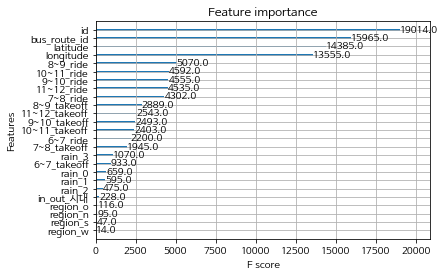

In [92]:
xgboost.plot_importance(xgb_model) #변수의 중요도를 의미하는 거임?

어떤 예제는 가장 밀접한 관계를 가지는 feature만 사용하라는데 그럼 id만 사용해야 하는데 이건 아닌거같음

In [93]:
predictions = xgb_model.predict(X_test)
predictions

array([0.02851328, 0.7041691 , 0.00168497, ..., 0.3227646 , 0.1440811 ,
       0.13191341], dtype=float32)

In [95]:
r_sq = xgb_model.score(X_train, y_train)
print(r_sq)
print(explained_variance_score(predictions, y_test))

0.6657463705259936
0.4144118898829636


r_sq는 정확도로 0.666이 나왔고, 설명분산점수(SSR-Mean Error)은 0.414 나옴

근데 뭔 의미지? 찾아보자

In [97]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: %f" %(rmse))

RMSE: 0.227851


다중선형회귀는 RMSE 0.29 나왔는데 XGB의 RMSE는 0.227로 더 낮게 나왔음을 확인할 수 있음. 낮은게 더 좋은 모델임

오예~^^

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
 
rf_reg = RandomForestRegressor(n_estimators=1000)
gbm_reg = GradientBoostingRegressor(n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

for model in [rf_reg,gbm_reg,xgb_reg,lgbm_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)